### Machine Learning Technique 2 - Classification

# 1. Document classification - Spam or Not Spam Emails 

This notebook will demonstrate text classification based on basic scikit functionalities. 
Document classification can be applied in many different applications such as filtering spam, detecting languages, classifying genres, and much more.

In this example we will build a simple spam filter which will classify texts of emails into two classes: spam, or not spam (a.k.a [ham](https://en.wiktionary.org/wiki/ham_e-mail)). 

The goal will be to build a simple spam filter. While the filters in services like Gmail are very advanced, the model we will have by the end of this lesson is effective, and quite accurate.

#### Data:

The data has been already fetched and transformed for you. You can find it in this repository under `../data/classification_data/emails.csv`.

FYI: the original data comes from the following websites:

- [Enron-Spam](http://www.aueb.gr/users/ion/data/enron-spam/)
- [SpamAssassin](https://spamassassin.apache.org/publiccorpus/)

#### Links:

- [Tutorial this lesson is based on](http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html)


# 2. Import Libraries

In [6]:
# Starting by importing our beloved libraries: pandas, numpy, matplotlib.pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 3. Load the Data

We are now going to load the `email.csv`, which contains all email data. This dataset is already labelled. This means that each email has a label `spam` or `ham`. 

*(BTW, ham is a relatively new synonym for "not Spam")*

In [7]:
import sys
import csv

# The CSV is quite large, so we might need to extend the limit the system.
#csv.field_size_limit(sys.maxsize)
csv.field_size_limit(500 * 1024 * 1024)

email_data = pd.read_csv('../data/classification_data/emails.csv', sep=None, encoding='utf-8')

/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.


In [8]:
# See the data
email_data.head()

,Unnamed: 0,class,text
0,data/GP/part9/msg13254.eml,spam,<html><body>\n\n<center><!--srrXBjvPZO2g--><a ...
1,data/GP/part11/msg3493.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
2,data/GP/part9/msg13164.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
3,data/kaminski-v/personal/352,ham,Return-Path: <0@aol.com>\n\nReceived: from rl...
4,data/farmer-d/entex/112,ham,---------------------- Forwarded by Tom Acton/...


# 4. Explore

In [9]:
# length of the data
print('Number of Emails: {}'.format( len(email_data) ))

Number of Emails: 30840


In [10]:
# Count the number of spam email and the number of ham emails
email_data['class'].value_counts()

spam    16432
ham     14408
Name: class, dtype: int64

Great, we have quite a 50/50 distribution of spam and not spam emails. 

When doing classification with labelled data, it is best to have a training dataset where each class is represented in an equal manner.

## 4.1 Check some Emails

In [11]:
email_data['text'][2]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" =\n\n"http://www.w3.org/TR/html4/loose.dtd"><html><head><title>G</armadillo>et=\n\n Yo</channel>ur Me</bandit>ds Here</title><META =\n\nHTTP-EQUIV=3D"Content-type" CONTENT=3D"text/html; =\n\ncharset=3DISO-8859-1"><style type=3D"text/css"><!-- .style5 =\n\n{font-family: Arial, Helvetica, sans-serif; font-size: 14px; } =\n\n--></style></head><body><p align=3D"justify" class=3D"style5">A =\n\npre</cowslip>mium so</inadvertent>urce for =\n\n<strong>V&iuml;&agrave;gr&aring;, V&atilde;l&iuml;&ucirc;m, =\n\nX&aacute;n&aring;x</strong>!</p><p align=3D"justify" =\n\nclass=3D"style5">G</status>et po</gallows>pul</cyprus>ar yet h</capo>ard =\n\nto fi</afford>nd HIG</barycentric>H LEVE</cardiod>L Muscl</chisholm>e =\n\nRelaxe</completion>rs, Pai</recessive>n Relie</shenandoah>f, =\n\nDi</postoperative>et pil</franklin>ls, presc</whish>ripti</attache>on =\n\nSleep</ebullient>ing Ai</approve>d Meds, an</oven>d almo</carroll>st =\n\na</e

In [12]:
import random

# Random number between 0 and #emails
random_index = random.randrange( len(email_data) )

print(email_data['class'][random_index])

print(email_data['text'][random_index])

spam
<html><title>CIBRES.COM</title><font face=3DArial size=3D2><table =

border=3D1 cellpadding=3D0 cellspacing=3D0 width=3D600 height=3D19 =

bordercolorlight=3D#FFFFFF bordercolordark=3D#FFFFFF =

bordercolor=3D#FFFFFF><tr><td bgcolor=3D#FFFFFF height=3D20 width=3D596 =

colspan=3D5><img border=3D0 =

src=3Dhttp://www.cibres.com/marketings/top.JPG width=3D600 =

height=3D63></td><tr><tr><td bgcolor=3D#000000 height=3D20 =

width=3D138>&nbsp; </font><b><a =

href=3D"http://www.cibres.com/forum/emailremove2.asp?remove=3Dyes&emailID=

=3D148827"><font face=3DTahoma size=3D2 =

color=3D#FFFFFF>Remove</font></a></b></td><td bgcolor=3D#000000 =

height=3D20 width=3D137><font color=3D#FFFFFF face=3DArial =

size=3D1>&nbsp;148827</font></td><td bgcolor=3D#000000 height=3D20 =

align=3Dcenter width=3D108><b><a =

href=3Dhttp://www.cibres.com/rnewsletter.htm target=3D_blank><font =

face=3DTahoma size=3D2 =

color=3D#FFFFFF>Subscription</font></a></b></td><td bgcolor=3D#000000 =

height=3D20 

Note that there is a lot of formatting code ([HTML](https://www.w3schools.com/html/)).

We might need some serious **pre-processing to remove all those things**.

## 4.2 Length of Emails

Let's, for fun, also check the length of the emails.

We are going to add the length of the raw email data as a column and then compute some statistics.

In [13]:
# First, we can try to compute the length for each email using a lambda expression
email_data['text'].apply(lambda text: len( str(text) ))

0          168
1          980
2         2033
3         3259
4          329
5           26
6         2861
7          222
8          557
9          541
10         830
11        1145
12        2874
13        1138
14         527
15        1139
16        4662
17        1896
18         927
19         302
20       11812
21         872
22         813
23         582
24         149
25        3735
26        2146
27          75
28        1363
29        2716
         ...  
30810      658
30811     1206
30812      729
30813    10097
30814      639
30815      220
30816      513
30817      217
30818      255
30819     1656
30820      236
30821      138
30822      978
30823      142
30824     2009
30825     4206
30826     3840
30827      162
30828      381
30829      601
30830      354
30831     5810
30832      207
30833     1788
30834      729
30835     1828
30836      963
30837     4646
30838     1205
30839      384
Name: text, dtype: int64

In [14]:
# Now, we can add that to a new column
email_data['length'] = email_data['text'].apply(lambda text: len( str(text) ))

# Then print the first 10
email_data.head(10)

,Unnamed: 0,class,text,length
0,data/GP/part9/msg13254.eml,spam,<html><body>\n\n<center><!--srrXBjvPZO2g--><a ...,168
1,data/GP/part11/msg3493.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",980
2,data/GP/part9/msg13164.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",2033
3,data/kaminski-v/personal/352,ham,Return-Path: <0@aol.com>\n\nReceived: from rl...,3259
4,data/farmer-d/entex/112,ham,---------------------- Forwarded by Tom Acton/...,329
5,data/farmer-d/first_delivery/2,ham,See attached letters\n\n\n\n,26
6,data/GP/part3/msg6005.eml,spam,This is a multi-part message in MIME format.\n...,2861
7,data/williams-w3/schedule_crawler/634,spam,\n\n\n\nStart Date: 1/13/02; HourAhead hour: 1...,222
8,data/kaminski-v/personal/180,ham,"Dr. Kaminski,\n\n\n\nOn Wednesday, June 14th I...",557
9,data/kaminski-v/conferences/240,ham,Thanks !\n\n\n\nYou are probably familar with ...,541


We can now make use of an useful function that we did not see yet, and that is the [describe()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) function.

Let's just see it in action.

In [15]:
# First we group our data by the `class`, take the column length (must be numerical)
# and then we compute some statistiques.
email_data.groupby('class')['length'].describe()

class       
ham    count     14408.000000
       mean       1934.945447
       std        7244.275390
       min           5.000000
       25%         341.000000
       50%         823.000000
       75%        1771.000000
       max      271632.000000
spam   count     16432.000000
       mean       3281.355526
       std        8981.399743
       min           1.000000
       25%         717.000000
       50%        1277.000000
       75%        2821.250000
       max      751895.000000
Name: length, dtype: float64

# 5. Pre-Processing

We have seen that the data is a little dirty and contains a lot of HTML. Let's clean this up! What? Does it look like real garbage to you? It is not pretty, that is sure, but fortunatly for us, there some amazing libraries out there.

In [16]:
# BEFORE
email_data['text'][2]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" =\n\n"http://www.w3.org/TR/html4/loose.dtd"><html><head><title>G</armadillo>et=\n\n Yo</channel>ur Me</bandit>ds Here</title><META =\n\nHTTP-EQUIV=3D"Content-type" CONTENT=3D"text/html; =\n\ncharset=3DISO-8859-1"><style type=3D"text/css"><!-- .style5 =\n\n{font-family: Arial, Helvetica, sans-serif; font-size: 14px; } =\n\n--></style></head><body><p align=3D"justify" class=3D"style5">A =\n\npre</cowslip>mium so</inadvertent>urce for =\n\n<strong>V&iuml;&agrave;gr&aring;, V&atilde;l&iuml;&ucirc;m, =\n\nX&aacute;n&aring;x</strong>!</p><p align=3D"justify" =\n\nclass=3D"style5">G</status>et po</gallows>pul</cyprus>ar yet h</capo>ard =\n\nto fi</afford>nd HIG</barycentric>H LEVE</cardiod>L Muscl</chisholm>e =\n\nRelaxe</completion>rs, Pai</recessive>n Relie</shenandoah>f, =\n\nDi</postoperative>et pil</franklin>ls, presc</whish>ripti</attache>on =\n\nSleep</ebullient>ing Ai</approve>d Meds, an</oven>d almo</carroll>st =\n\na</e

In [17]:
# AFTER
from bs4 import BeautifulSoup

BeautifulSoup(email_data['text'][2], 'lxml').get_text()

'"http://www.w3.org/TR/html4/loose.dtd">Get=\n\n Your Meds Here<!-- .style5 =\n\n{font-family: Arial, Helvetica, sans-serif; font-size: 14px; } =\n\n-->A =\n\npremium source for =\n\nVïàgrå, Vãlïûm, =\n\nXánåx!Get popular yet hard =\n\nto find HIGH LEVEL Muscle =\n\nRelaxers, Pain Relief, =\n\nDiet pills, prescription =\n\nSleeping Aid Meds, and almost =\n\nany other prescription =\n\nmedication.ThatRXStore is your best online =\n\nsource for FDA USA APPROVED =\n\ndrugs No forms to =\n\nfill out... EVERYONE is =\n\napproved... we respect your =\n\nPRIVACY! Click Here for the =\n\nBest Place for Meds =\n\nOnlineWe =\n\nship WORLDWIDE!... afdezzz\n\nnfoazz\n\nftzl\n\nieoe\n'

Great, looks much better!

Let's use this and add a **new column** for our DataFrame:

In [18]:
email_data['text_processed'] = email_data['text'].apply( lambda text: BeautifulSoup(str(text), 'lxml').get_text() )

/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.marketwatch.com/news/story.asp?print=1&guid={9490A893-4795-4A61-9B4B-268C6F0C34DC}&siteid=yhoo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.worth.com/magazine/index.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.imagestation.com/album/?id=4293626105&code=518755&mode=invite" looks like 

In [20]:
email_data.head(10)

,Unnamed: 0,class,text,length,text_processed
0,data/GP/part9/msg13254.eml,spam,<html><body>\n\n<center><!--srrXBjvPZO2g--><a ...,168,\n\n
1,data/GP/part11/msg3493.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",980,\n\nmen hasn't.\n\n\n\nNot =\n\neverything tha...
2,data/GP/part9/msg13164.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",2033,"""http://www.w3.org/TR/html4/loose.dtd"">Get=\n\..."
3,data/kaminski-v/personal/352,ham,Return-Path: <0@aol.com>\n\nReceived: from rl...,3259,Return-Path: <0@aol.com>\n\nReceived: from rl...
4,data/farmer-d/entex/112,ham,---------------------- Forwarded by Tom Acton/...,329,---------------------- Forwarded by Tom Acton/...
5,data/farmer-d/first_delivery/2,ham,See attached letters\n\n\n\n,26,See attached letters\n\n\n\n
6,data/GP/part3/msg6005.eml,spam,This is a multi-part message in MIME format.\n...,2861,This is a multi-part message in MIME format.\n...
7,data/williams-w3/schedule_crawler/634,spam,\n\n\n\nStart Date: 1/13/02; HourAhead hour: 1...,222,Start Date: 1/13/02; HourAhead hour: 10; No a...
8,data/kaminski-v/personal/180,ham,"Dr. Kaminski,\n\n\n\nOn Wednesday, June 14th I...",557,"Dr. Kaminski,\n\n\n\nOn Wednesday, June 14th I..."
9,data/kaminski-v/conferences/240,ham,Thanks !\n\n\n\nYou are probably familar with ...,541,Thanks !\n\n\n\nYou are probably familar with ...


In [21]:
# Let's remove all \n
email_data['text_processed'] = email_data['text_processed'].apply( lambda text: text.replace('\n', '') )

In [22]:
# Check the number of duplicates and/or empty
def check_data():
    print('Number of duplicates: {}'.format( email_data['text_processed'].duplicated().sum() ))
    print('Number of empty: {}'.format( len(email_data[ email_data['text_processed'] == '' ]) ))
    
check_data()

Number of duplicates: 2188
Number of empty: 546


In [23]:
# Remove all empty rows
email_data = email_data.drop( email_data[ email_data['text_processed'] == ''].index )

In [24]:
check_data()

Number of duplicates: 1643
Number of empty: 0


# 6. Slice / Split the data into training and validation

Now we are going to split the data in order to train and evaluate the model. 

We will perform a 90%/10% for training and testing. The training will be used to train the model, using a technique called cross validation. 

In `sklearn` there is a class called [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) for this purpose. Cross validation consist of splitting the data in k parts / folds and each part is then used once as a validation data while the k-1 remaining parts are used for training.

In [25]:
from sklearn.model_selection import train_test_split

email_train, email_test = train_test_split(email_data, test_size=0.1, random_state=42)

In [26]:
print('Size of Training : {}'.format(len(email_train)))
print('Size of Testing  : {}'.format(len(email_test)))

Size of Training : 27264
Size of Testing  : 3030


# 7. Feature Extraction

Now come sthe time to extract data or knowledge from the processed text. A machine learning algorithm needs more than text to work. This is why we need to extract features from the text and for example, generate a count by word. An algorithm basically needs numbers, especially in machine learning.

We will start by using a basic `CountVectorizer` to count each word.

**Links:**

- [CountVectorizer Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [27]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a new CountVectorizer instance
count_vectorizer = CountVectorizer(max_features=10000)

# fit_transform learns the vocabulary dictionary of the dataframe and extracts word counts as features.
%time wordcounts = count_vectorizer.fit_transform(email_train['text_processed'])

CPU times: user 6.59 s, sys: 172 ms, total: 6.76 s
Wall time: 6.77 s


In [28]:
# Check the size of the matrix
print(wordcounts.shape)

(27264, 10000)


The matrix resulting from the `transform` is a `n*m` matrix , where:

- `n` is the number of documents (emails)
- `m` is the number of words

The matrix looks something like this:

|Document |word1|word2|word3|...|
|---|---|---|---|---|
|0        | 4| 8| 0| ... |
|1        | 0| 23| 5| ... |
|2        | 12| 3| 14| ... |
|...        | ...| ...| ...| ... |

In [30]:
# Get the vocabulary
vocabulary = np.array( count_vectorizer.get_feature_names() )

# Sum up the counts of each vocabulary word
dist = np.sum(wordcounts.toarray(), axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in sorted(zip(vocabulary, dist), key=lambda pair: pair[1], reverse=True):
    print(count, tag)

222084 the
151158 to
112250 and
107603 of
81127 in
61956 for
53729 is
52936 you
49538 enron
47580 on
43986 this
42854 that
40206 20
35425 with
35361 be
30331 we
29956 as
29660 it
29196 have
28617 from
28105 will
26879 are
26751 your
26619 at
24530 or
23465 by
22130 ect
20702 not
18215 if
17444 com
16494 our
16399 company
15569 has
15531 an
15382 all
14446 please
14320 was
13448 3d
13309 me
13291 can
12939 would
12855 hou
12624 its
12505 2001
12493 any
11847 said
11630 new
11480 no
11147 more
10823 2000
10407 10
10331 http
10281 but
10154 00
10013 gas
9881 energy
9550 up
9534 may
9425 they
9401 about
9346 which
8905 he
8872 time
8719 message
8669 one
8649 been
8456 subject
8405 do
8398 my
8139 out
8126 information
7870 get
7791 power
7762 price
7708 their
7639 01
7514 us
7366 know
7358 font
7353 there
7282 am
7242 11
7203 also
7150 re
7085 www
6978 business
6921 other
6906 these
6894 so
6840 market
6814 here
6758 only
6739 corp
6716 some
6641 what
6598 000
6416 vince
6376 br
6339 need
6

# 8. Create the Model - Classify Emails

## 8.1 Naive Bayes Classifier

The first classification algorithm will be one based on Naive Bayes. 

**Links:**

- [Documentation MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

- [Advanced Explanations 1](http://www.statsoft.com/textbook/naive-bayes-classifier)
- [Advanced Explanations 2](http://software.ucv.ro/~cmihaescu/ro/teaching/AIR/docs/Lab4-NaiveBayes.pdf)
- [Advanced Explanations 3](http://ix.cs.uoregon.edu/~dou/research/papers/icdm11_fw.pdf)

In [31]:
# Import sklean implementaton of Naive Bayes
from sklearn.naive_bayes import MultinomialNB

classifier_model = MultinomialNB().fit(wordcounts, email_train['class'])

In [32]:
# Now lets check few examples

examples = [
    "I'm going to attend the Linux users group tomorrow.", 
    'Free Viagra call today!', 
    'Python online classes'
]

example_counts = count_vectorizer.transform(examples)

predictions = classifier_model.predict(example_counts)

# print the predictions
for index, example in enumerate(examples):
    print('{:5} - "{}"'.format(predictions[index], example))

ham   - "I'm going to attend the Linux users group tomorrow."
spam  - "Free Viagra call today!"
spam  - "Python online classes"


# 9. Measure Performance

All right, we have a model, and now we should measure its performance and find out if the model is accurate or not.

We will define a few method to help us print the accuracy of our model(s).

In [33]:
from sklearn.cross_validation import *

def cross_validate(classifier, x, true_labels, k=5):
    # Create our cross validator with 5-fold
    cv = KFold(true_labels.shape[0], k, shuffle=True, random_state=42)

    # Compute the scores
    scores = cross_val_score(classifier, x, true_labels, cv=cv)
    
    # Print the results
    print("Accuracy: {:.2f} (+/- {:.2f}) and {} folds".format(scores.mean(), scores.std() * 2, k))

    return scores

/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
scores = cross_validate(classifier_model, wordcounts, email_train['class'])

Accuracy: 0.95 (+/- 0.01) and 5 folds


Model is trained on training data. We have now to take the test data and find out the real accuracy:

In [35]:
# Create the CountVectorizer for the test data
%time wordcounts_test = count_vectorizer.transform(email_test['text_processed'])

CPU times: user 613 ms, sys: 5.84 ms, total: 619 ms
Wall time: 619 ms


In [36]:
# Predict our test classes
predictions = classifier_model.predict(wordcounts_test)

In [55]:
# Measure Accuracy of Test
from sklearn.metrics import accuracy_score

print('Accuracy : {:.2}'.format( accuracy_score(email_test['class'], predictions)))

Accuracy : 0.94


## 9.1 Classification Report, Confusion Matrix, ...

In this section, we are going to see additional ways to evaluate our classifier. Those evaluation only work with labelled data, because the predictions are evaluated based on the true values from your data.

**Links:**

- [Classification Report Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [Confusion Matrix Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [Confusion Matrix, Precison and Recall Explained](http://docs.statwing.com/the-confusion-matrix-and-the-precision-recall-tradeoff/)
- [Confusion Matrix Terminology](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

In [38]:
from sklearn.metrics import classification_report

In [39]:
# Print the classification report
print(classification_report(email_test['class'], predictions))

             precision    recall  f1-score   support

        ham       0.91      0.98      0.94      1476
       spam       0.98      0.91      0.94      1554

avg / total       0.95      0.94      0.94      3030



In [40]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predictions, classes):
    # Create Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)

    print('Confusion Matrix:')
    print(cm)
    
    # Plot    

    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    
    plt.xlabel('predicted class')
    plt.ylabel('expected class')
    
    tick_marks = np.arange( len(classes) )
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    

    plt.colorbar()

Confusion Matrix:
[[1443   33]
 [ 136 1418]]


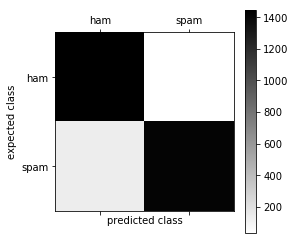

In [48]:
plot_confusion_matrix(email_test['class'], predictions, ['ham', 'spam'])

In [42]:
email_test['class'].value_counts()

spam    1554
ham     1476
Name: class, dtype: int64

In [46]:
len(email_test['class'])

3030

**Confusion Matrix Explained:**

- There are 2 possible predicted classes: *spam* or *ham*.
- In total we have `1443 + 1418 +33 + 136 = 3030` predictions.
- Out of 3030 predictions, 1443 have been predicted as *ham* and 1476 as *spam*
- Actually `136 + 1418 = 1554` are really *spam* and `1443 + 33 = 1476` are really *ham*

**Terms:**

Let's go into more detail and define the correct terms:

- True Positives (TP): We predicted *ham* (yes, it is safe), and the emails are *ham*.
- True Negatives (TN): We predicted *spam* (no, it is not safe), and the emails are *spam*.
- False Positives (FP): We predicted *ham* (yes), but the emails are *spam*.
- False Negatives (FN): We predicted *spam* (no), but the emails are *ham*.

Those terms map to the confusion matrix above like this:

![Image 1](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

**Accuracy:**

Overall, how often is the classifier correct?

    ( TP + TN ) / total = ( 1443 + 1418 ) / 3030 = 0.94

**Precision:**

When it predicts *ham* (yes), how often is it correct?

    TP / ( TP + FP ) = 1443 / (1443 + 136) = 0.91

**Recall:**

Recall is also called *Sensitivity* or *True Positive Rate*.
It describes: When it's actually *ham* (yes), how often does it predict *ham* (yes)?

    TP / ( TP + FN ) = 1443 / (1443 + 33) = 0.98 (rounded up)



In [71]:
print('Accuracy                        :', ( 1443 + 1418 ) / 3030)
print('Accuracy from sklearn function  :', accuracy_score(email_test['class'], predictions))

Accuracy                        : 0.9442244224422442
Accuracy from sklearn function  : 0.944224422442


In [72]:
print('Precision:', 1443 / (1443 + 136) )

Precision: 0.9138695376820772


In [73]:
print('Recall:', 1443 / (1443 + 33))

Recall: 0.9776422764227642
